# Bivariate Analysis

Imports

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [4]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Helpers

In [5]:
def properlabel(s):
    a = s.split('_')
    proper_label = f'{" ".join(a[:-1]).title()} ({a[-1]})'
    return proper_label
    

### Scatterplot

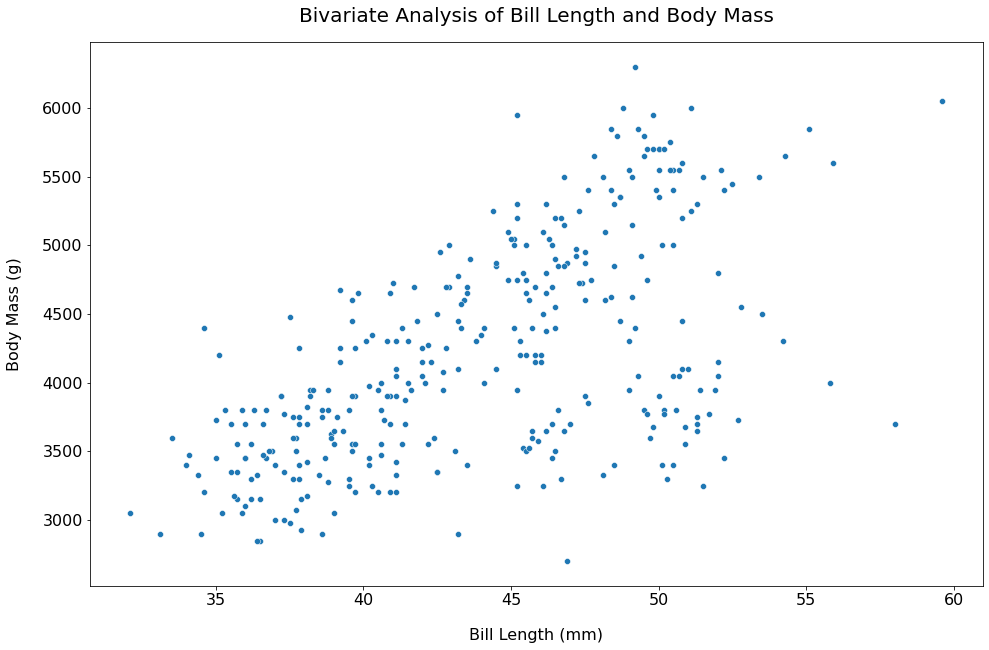

In [6]:
plt.figure(figsize=(16, 10))
fig = sns.scatterplot(data=df, x=df['bill_length_mm'], y=df['body_mass_g'])
fig.set_title('Bivariate Analysis of Bill Length and Body Mass',
              fontsize=20, pad=20)
fig.set_xlabel('Bill Length (mm)', fontsize=16, labelpad=20)
fig.set_ylabel('Body Mass (g)', fontsize=16, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.draw()


### Crosstab

In [7]:
pd.crosstab(index=df['species'], columns=df['sex'])


sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


### Pivot Table

In [8]:
pd.pivot_table(data=df, index='species',
               values='bill_length_mm', aggfunc='mean')


,bill_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


### Pair Plot

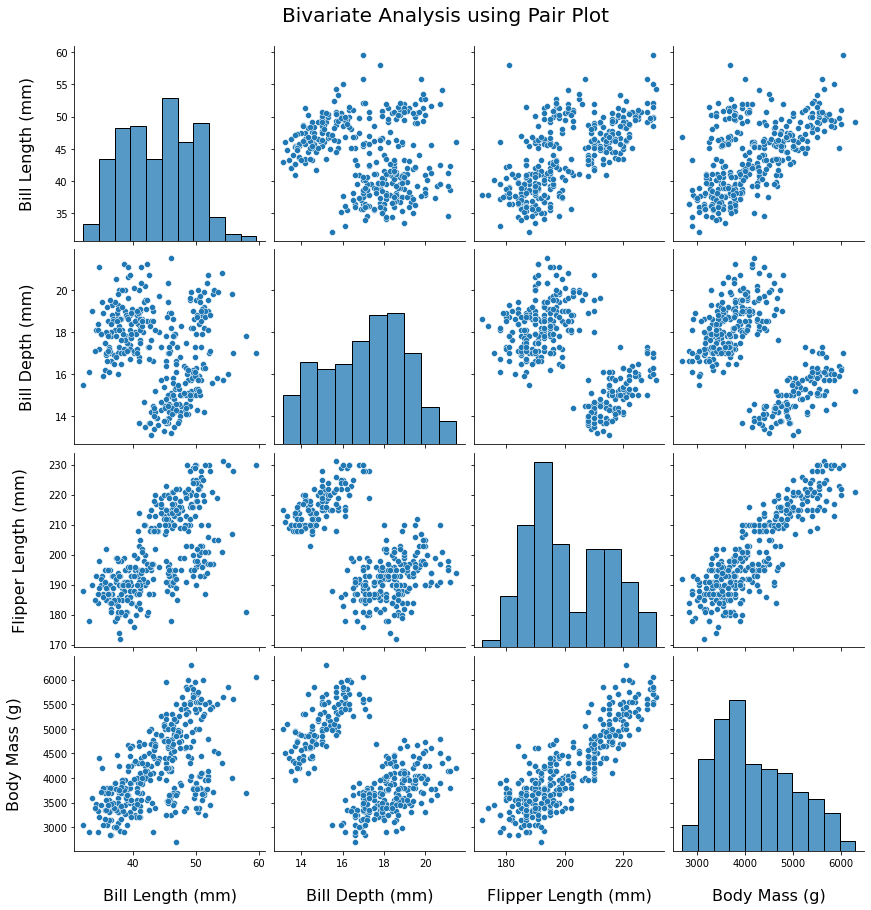

In [9]:
fig = sns.pairplot(data=df, height=3)
for ax in fig.axes.flatten():
    ax.set_xlabel(properlabel(ax.get_xlabel()), fontsize=16, labelpad=20)
    ax.set_ylabel(properlabel(ax.get_ylabel()), fontsize=16, labelpad=20)
plt.suptitle('Bivariate Analysis using Pair Plot', fontsize=20, y=1.03)
plt.draw()

### Bar Plot

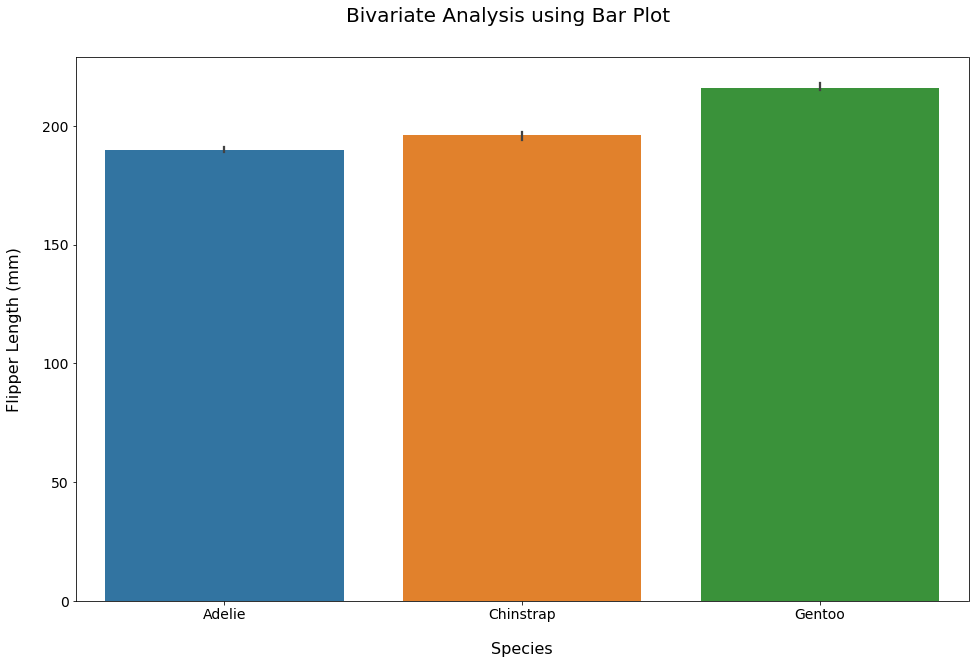

In [10]:
plt.figure(figsize=(16, 10))
fig = sns.barplot(data=df, x='species', y='flipper_length_mm',
                  estimator=np.median, hue='species')
plt.suptitle("Bivariate Analysis using Bar Plot", fontsize=20, y=0.95)
fig.set_xlabel("Species", fontsize=16, labelpad=20)
fig.set_ylabel("Flipper Length (mm)", fontsize=16, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.draw()


Generate a plot to show comparison between all features of the different penguin species.

### Box Plots

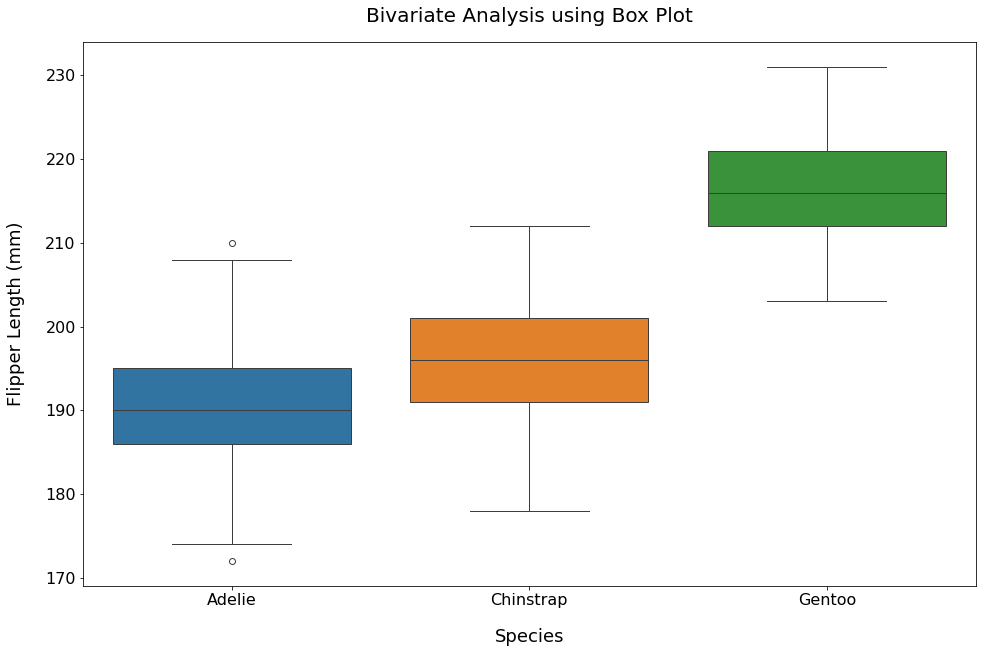

In [11]:
plt.figure(figsize=(16, 10))
fig = sns.boxplot(data=df, x='species', y='flipper_length_mm', hue='species')
fig.set_title('Bivariate Analysis using Box Plot', fontsize=20, pad=20)
fig.set_xlabel("Species", fontsize=18, labelpad=20)
fig.set_ylabel("Flipper Length (mm)", fontsize=18, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.draw()


Outiers

In [12]:
from scipy import stats
flipper_length = df[df['species'] == 'Adelie']['flipper_length_mm'].fillna(
    df['flipper_length_mm'].mean())
iqr = stats.iqr(flipper_length)
q1 = np.quantile(flipper_length, 0.25)
q3 = np.quantile(flipper_length, 0.75)

Lower outlier

In [13]:
df[(df['species'] == 'Adelie') & (df['flipper_length_mm'] < q1 - 1.5 * iqr)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,Female


Upper outlier

In [14]:
df[(df['species'] == 'Adelie') & (df['flipper_length_mm'] > q3 + 1.5 * iqr)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male


### Histogram

In [15]:
m = df[df['sex'] == 'Male']
f = df[df['sex'] == 'Female']

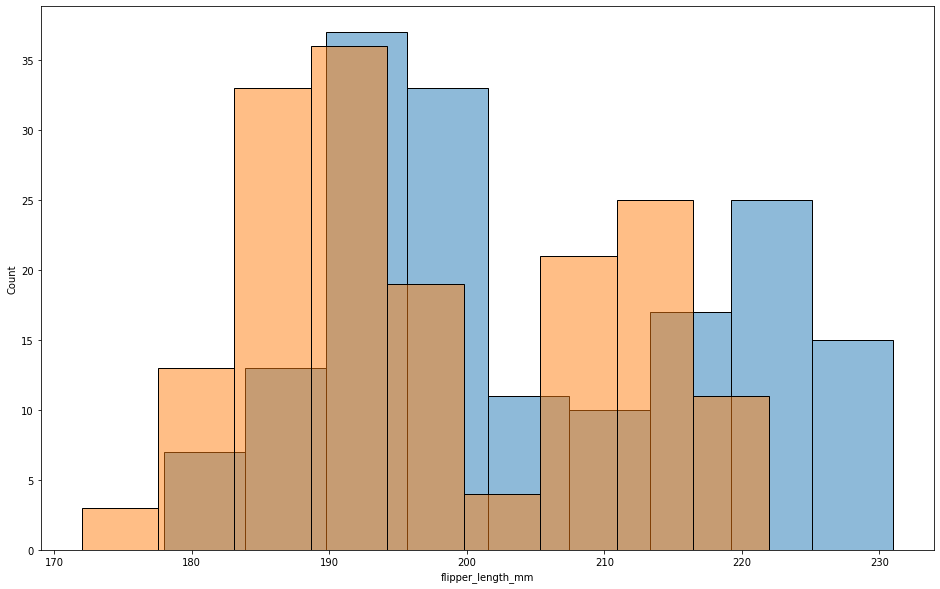

In [16]:
plt.figure(figsize=(16, 10))
sns.histplot(data=m, x='flipper_length_mm', alpha=0.5)
sns.histplot(data=f, x='flipper_length_mm', alpha=0.5)
plt.draw()

### Correlation Analysis

In [17]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
selected_columns = ['bill_length_mm', 'body_mass_g'] 

In [21]:
df[selected_columns].corr()

,bill_length_mm,body_mass_g
bill_length_mm,1.00000,0.59511
body_mass_g,0.59511,1.00000


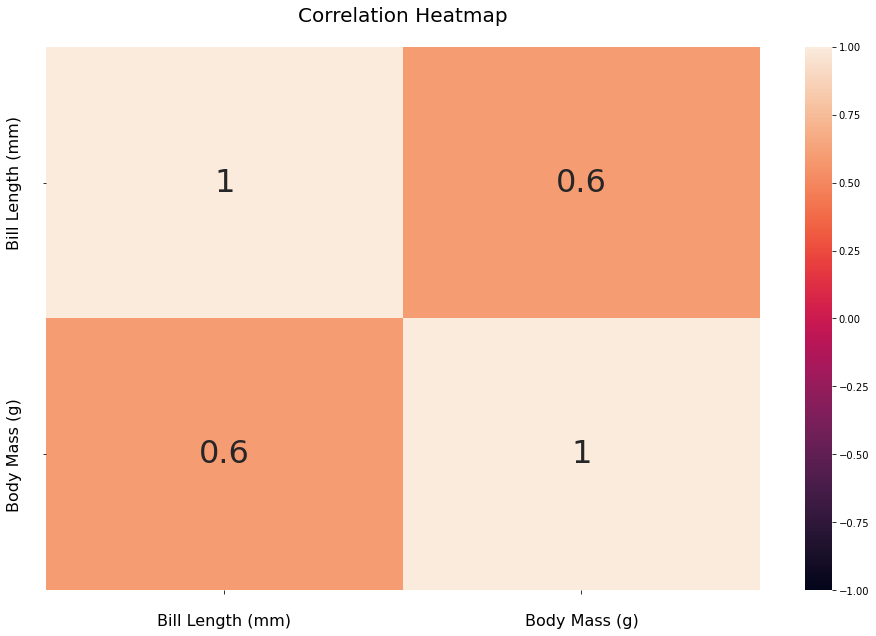

In [20]:
plt.figure(figsize=(16, 10))
corr = df[selected_columns].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, annot_kws={'size': 32})
ax.set_title('Correlation Heatmap', fontsize=20, pad=25)
ax.set_xticklabels(map(properlabel, selected_columns), fontsize=16)
ax.set_yticklabels(map(properlabel, selected_columns), fontsize=16)
ax.tick_params(pad=20)
plt.draw()

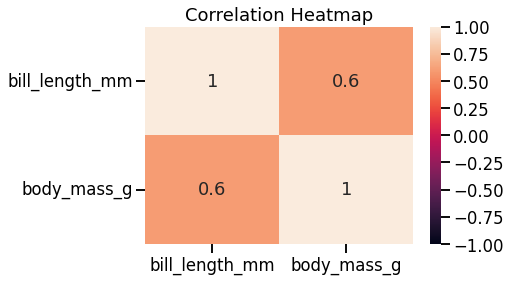

In [22]:
with sns.plotting_context('talk'):
    ax = sns.heatmap(df[selected_columns].corr(), vmin=-1, vmax=1, annot=True)
    ax.set_title('Correlation Heatmap')